<a href="https://colab.research.google.com/github/perses08/Func_API_viz_model/blob/main/Multi_output_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [2]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)

  return y1, y2

In [3]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']

In [4]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()

In [5]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [6]:
#UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'


df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)


train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()


train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)


norm_train_X = norm(train)
norm_test_X = norm(test)

In [7]:
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)


y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)


y2_output = Dense(units='1', name='y2_output')(third_dense)


model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss = {'y1_output':'mse','y2_output':'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()}
              )

In [8]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

In [9]:
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 2s 20ms/step - loss: 594.1928 - y1_output_loss: 287.0366 - y2_output_loss: 307.1562 - y1_output_root_mean_squared_error: 16.4521 - y2_output_root_mean_squared_error: 16.9483 - val_loss: 33.7274 - val_y1_output_loss: 14.9545 - val_y2_output_loss: 18.7729 - val_y1_output_root_mean_squared_error: 3.8671 - val_y2_output_root_mean_squared_error: 4.3328
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 28.3182 - y1_output_loss: 11.5665 - y2_output_loss: 16.7516 - y1_output_root_mean_squared_error: 3.3958 - y2_output_root_mean_squared_error: 4.0726 - val_loss: 25.4503 - val_y1_output_loss: 11.2301 - val_y2_output_loss: 14.2202 - val_y1_output_root_mean_squared_error: 3.3511 - val_y2_output_root_mean_squared_error: 3.7710
Epoch 3/500
62/62 [==============================] - 0s 4ms/step - loss: 23.9199 - y1_output_loss: 10.5124 - y2_output_loss: 13.4075 - y1_output_root_mean_squared_error: 3.2419 - y2_output_root_mean_s

In [10]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 0.7269 - y1_output_loss: 0.2038 - y2_output_loss: 0.5231 - y1_output_root_mean_squared_error: 0.4515 - y2_output_root_mean_squared_error: 0.7232
Loss = 0.7268943786621094, Y1_loss = 0.20381556451320648, Y1_mse = 0.4514593780040741, Y2_loss = 0.5230787992477417, Y2_mse = 0.7232418656349182


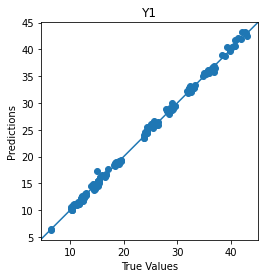

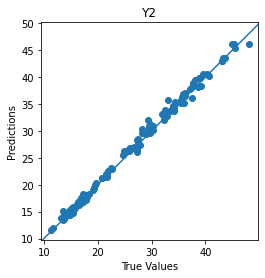

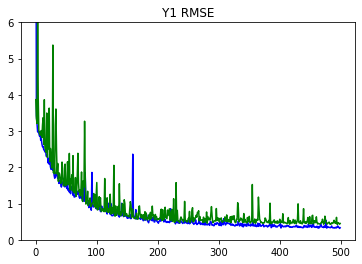

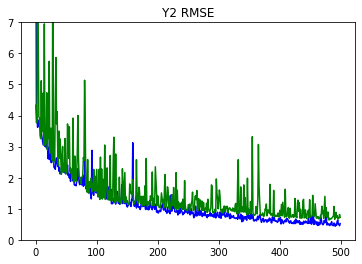

In [11]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)